In [4]:

%%time

import os
from adlfs import AzureBlobFileSystem
from common.functions.functions import Functions
import time

import json
import pandas
import pandas as pd
from tqdm import tqdm

from common.schemas.pyarrow_schema import tagging_schema
from common.storage.azure_file_storage import AzureFileStorageAdapter
from common.captioning.azure_descriptions import AzureCaption
from common.schemas.pyarrow_schema import schema
from PIL import Image
import requests

tqdm.pandas(desc="Progress")
file_system: AzureBlobFileSystem = AzureFileStorageAdapter('data').get_file_storage()

CPU times: total: 10.4 s
Wall time: 24 s


In [5]:
file_system.download('models/sd-prompt-bot', 'sd-prompt-bot', recursive=True)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [2]:
model_dir = 'SexyDiffusion-3'
gpt_dir = 'sd-prompt-bot'

In [3]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
question = "<|startoftext|> <|model|> SexyGirl"

prompt = f"{question}"

device = torch.device(f"cuda" if torch.cuda.is_available() else "cpu")

model = GPT2LMHeadModel.from_pretrained(gpt_dir)
tokenizer = GPT2Tokenizer.from_pretrained(gpt_dir)

generation_prompt = tokenizer(prompt, add_special_tokens=True, return_tensors="pt")

model.to(device)

generation_prompt.to(device)

inputs = generation_prompt.input_ids

attention_mask = generation_prompt['attention_mask']

sample_outputs = model.generate(inputs=inputs,
								attention_mask=attention_mask,
								do_sample=True,
								max_length=1024,
								num_return_sequences=1,
								temperature=.67,
								top_k=30,
								top_p=.3,
								repetition_penalty=1.1)
result = ""
for i, sample_output in enumerate(sample_outputs):
    result = tokenizer.decode(sample_output, skip_special_tokens=False)

display(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'<|startoftext|> <|model|> SexyGirl <|prompt|> #906 <|text|> a woman in a white shirt and black skirt<|endoftext|>'

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Some weights of the model checkpoint at SexyDiffusion-3\vae were not used when initializing AutoencoderKL: ['encoder.mid_block.attentions.0.to_out.0.bias', 'encoder.mid_block.attentions.0.to_out.0.weight', 'encoder.mid_block.attentions.0.to_q.weight', 'encoder.mid_block.attentions.0.to_v.weight', 'decoder.mid_block.attentions.0.to_out.0.weight', 'decoder.mid_block.attentions.0.to_k.bias', 'encoder.mid_block.attentions.0.to_v.bias', 'decoder.mid_block.attentions.0.to_q.weight', 'encoder.mid_block.attentions.0.to_k.bias', 'decoder.mid_block.attentions.0.to_v.bias', 'decoder.mid_block.attentions.0.to_out.0.bias', 'decoder.mid_block.attentions.0.to_k.weight', 'encoder.mid_block.attentions.0.to_

  0%|          | 0/50 [00:00<?, ?it/s]

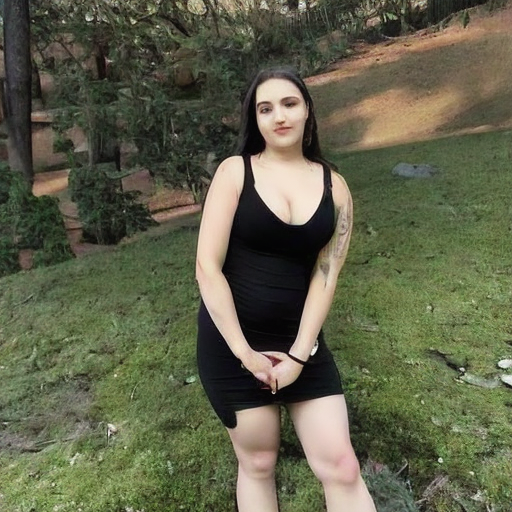

In [11]:
from diffusers import DiffusionPipeline, EulerDiscreteScheduler, DPMSolverMultistepScheduler, StableDiffusionPipeline

# stable_diffusion = DiffusionPipeline.from_pretrained(f"{model_dir}", safety_checker=None)

diff_pipe: DiffusionPipeline = DiffusionPipeline.from_pretrained(f"{model_dir}", safety_checker=None)

pipe = StableDiffusionPipeline(**diff_pipe.components)

pipe.to("cuda")
#
prompt = "a woman in a white shirt and black skirt"
#
image = pipe(prompt, height=512, width=512, guidance_scale=8, num_inference_steps=50).images[0]
#
display(image)